In [1]:
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("C:/Users/Vicky Wu/Desktop/Fall 2018/IEOR 135/project/data/bitcoin/bitcoin_ytd.csv")

In [34]:
df = df.iloc[: ,2:9]

In [35]:
df

,High,Low,Close,Adj Close,Volume
0,18.209999,18.040001,18.129999,16.595615,77500
1,18.209999,18.030001,18.209999,16.668848,100100
2,18.230000,17.969999,17.990000,16.467464,117600
3,18.080000,17.910000,17.959999,16.440001,170500
4,18.090000,17.969999,18.059999,16.531538,109900
5,18.200001,18.090000,18.200001,16.659693,154800
6,18.209999,18.139999,18.209999,16.668848,78300
7,18.260000,18.139999,18.219999,16.677998,101500
8,18.219999,18.059999,18.219999,16.677998,120000
9,18.200001,18.030001,18.139999,16.604769,175000


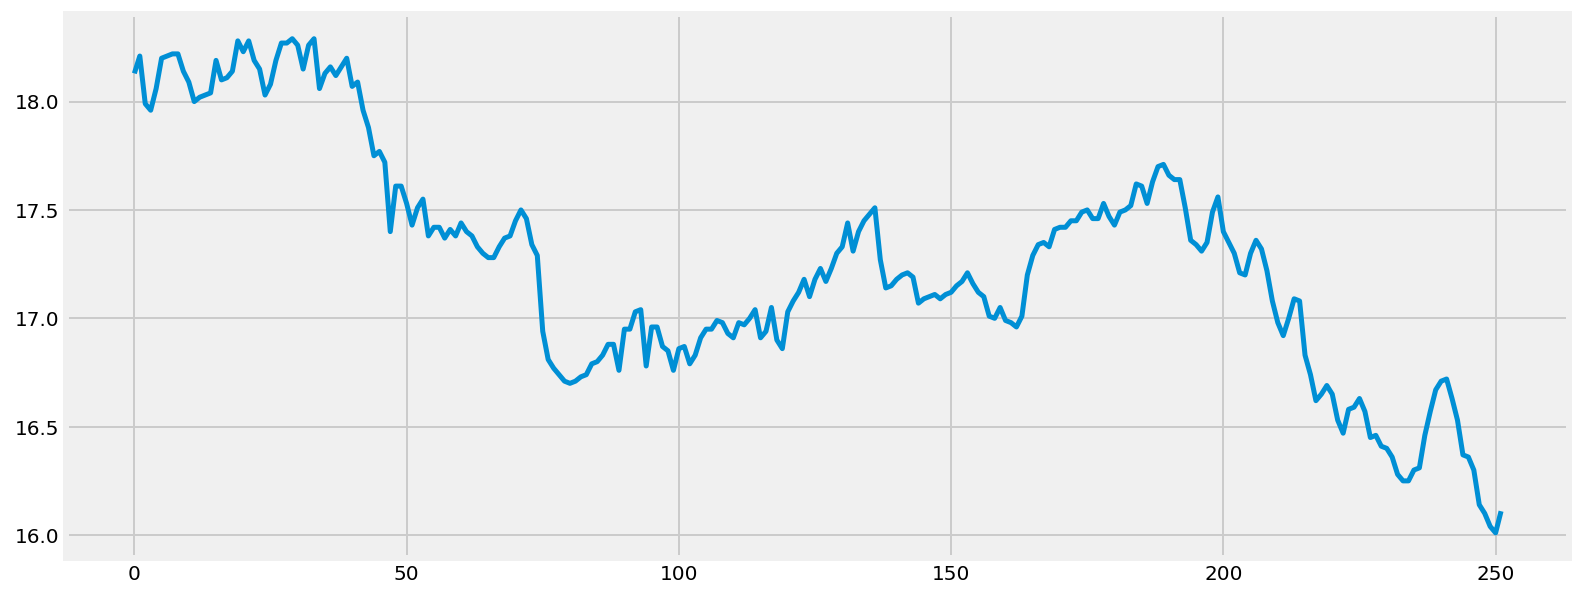

In [36]:
btc_close = df['Close']
btc_close.plot(lw=2.5, figsize=(12, 5))
plt.show()

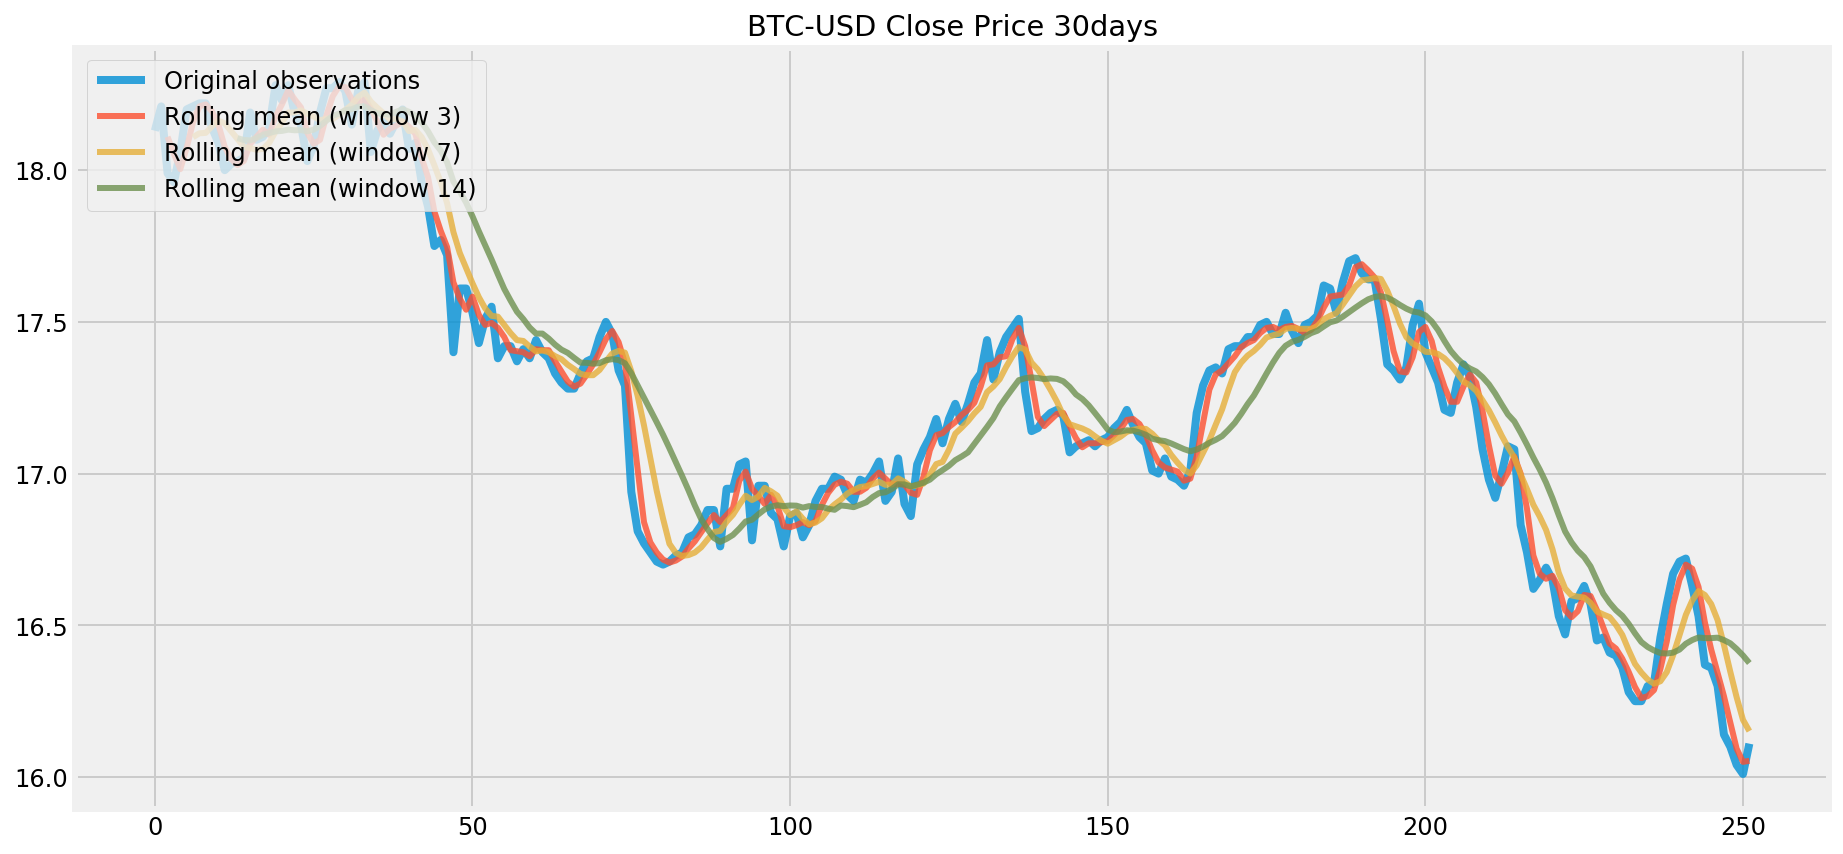

In [6]:
#moving average
rroll_d3 = btc_close.rolling(window=3).mean()
rroll_d7 = btc_close.rolling(window=7).mean()
rroll_d14 = btc_close.rolling(window=14).mean()

plt.figure(figsize=(14,7))
plt.plot(btc_close, alpha=0.8,label='Original observations')
plt.plot(rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot(rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
plt.plot(rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')
plt.title('BTC-USD Close Price 30days')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [7]:
short_window = 3
mid_window = 10
signals = pd.DataFrame(index=btc_close.index)
signals['signal'] = 0.0
roll_d3 = btc_close.rolling(window=short_window).mean()
roll_d10 = btc_close.rolling(window=mid_window).mean()
signals['short_mavg'] = roll_d3
signals['mid_mavg'] = roll_d10
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()


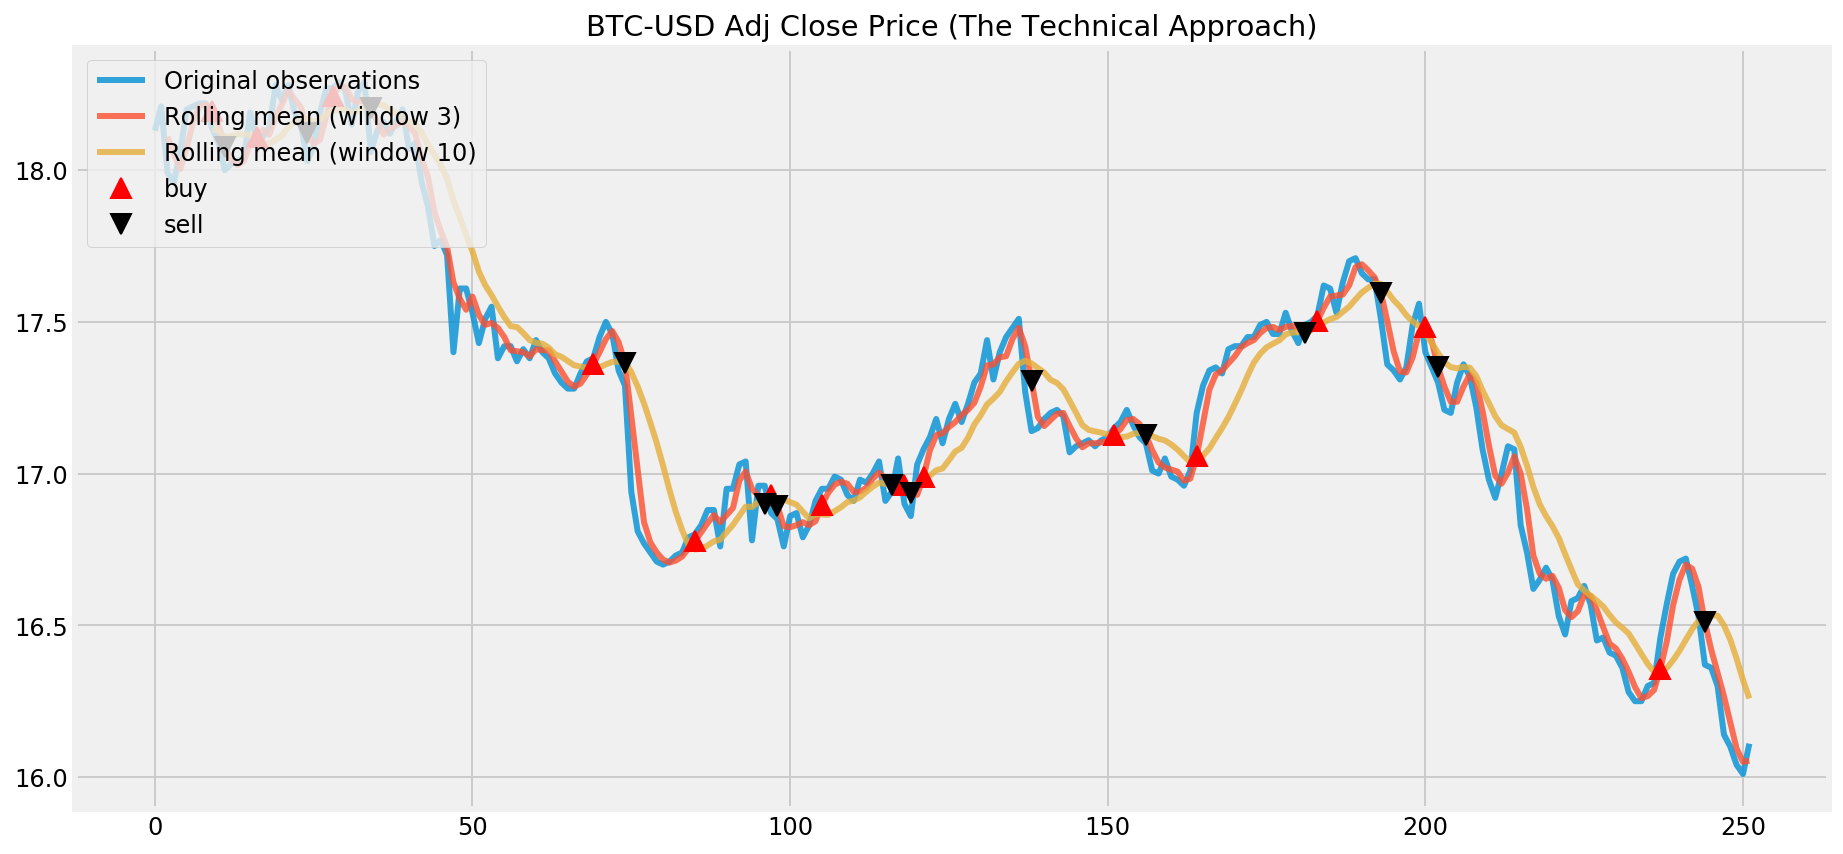

In [28]:
plt.figure(figsize=(14, 7))
plt.plot( btc_close, lw=3, alpha=0.8,label='Original observations')
plt.plot(roll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot( roll_d10, lw=3, alpha=0.8,label='Rolling mean (window 10)')
plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k', label='sell')
plt.title('BTC-USD Adj Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [29]:
initial_investment = list(btc_close.loc[list(signals[signals.positions == 1.0].index)])[0]
temp = list(signals[signals.positions == 1.0].index)
temp2 = temp[0:len(temp)-1]
bought = np.sum(btc_close.loc[temp]*-1.0)
sold = np.sum(btc_close.loc[list(signals[signals.positions == -1.0].index)])
current_btc_value = list(btc_close)[-1]
balance = pd.DataFrame([btc_close.loc[list(signals[signals.positions == 1.0].index)]*-1.0,
              btc_close.loc[list(signals[signals.positions == -1.0].index)]]).transpose()
balance = balance.fillna(0)
balance['balance'] = balance.sum(axis=1)
print ("Initial investment amount: {0:.2f} USD".format(initial_investment))
print ("Maximum invested amount: {0:.2f} USD".format(abs(min(balance.cumsum().balance))))
print ("Current asset value: {0:.2f} USD".format(bought+sold+current_btc_value))

Initial investment amount: 18.14 USD
Maximum invested amount: 18.48 USD
Current asset value: 15.79 USD


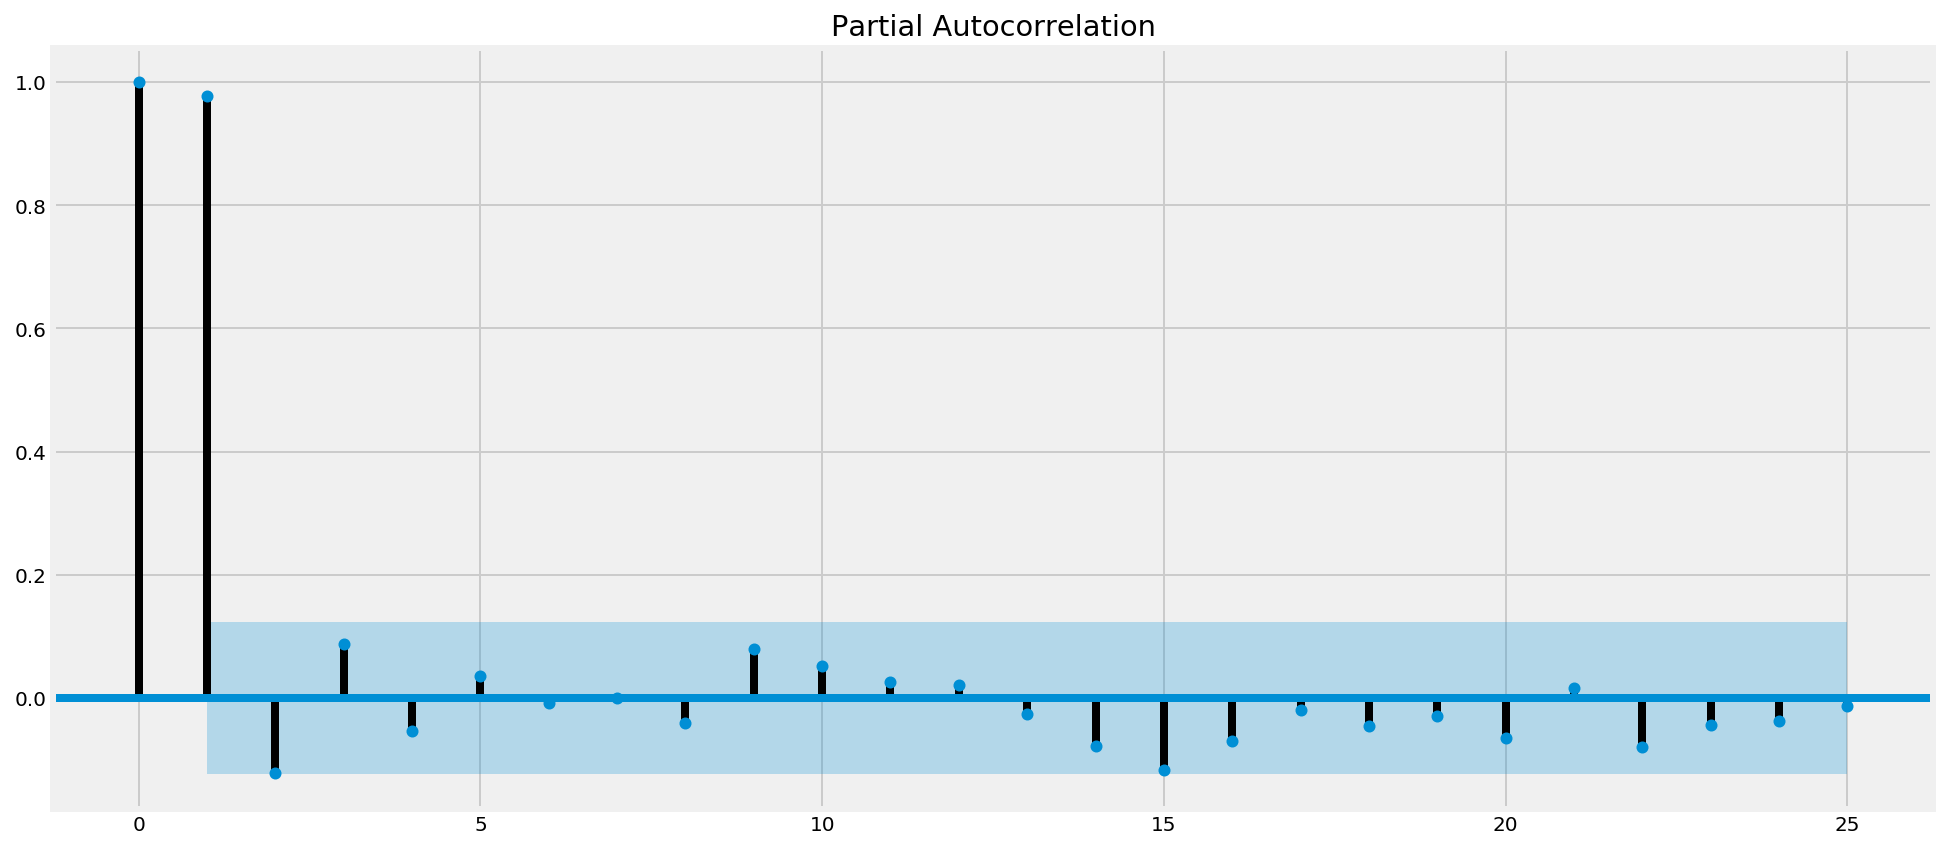

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_pacf(btc_close, lags=25)
pyplot.show()

In [16]:

# Initial approximation of parameters
qs = range(0, 18)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_close, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

bad parameter combination: (2, 1)


In [17]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

   parameters         aic
37     (2, 2) -529.792903
19     (1, 1) -525.891204
20     (1, 2) -524.036281
4      (0, 4) -523.872678
1      (0, 1) -523.573707


In [37]:
#best_model2 = SARIMAX(btc_close, order=(17, d, 2)).fit(disp=-1)
print(best_model2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                  252
Model:              SARIMAX(17, 1, 2)   Log Likelihood                 272.600
Date:                Tue, 27 Nov 2018   AIC                           -505.201
Time:                        14:35:35   BIC                           -434.692
Sample:                             0   HQIC                          -476.826
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0599      2.115     -0.028      0.977      -4.204       4.084
ar.L2          0.4218      1.246      0.339      0.735      -2.019       2.863
ar.L3          0.0402      0.086      0.470      0.6

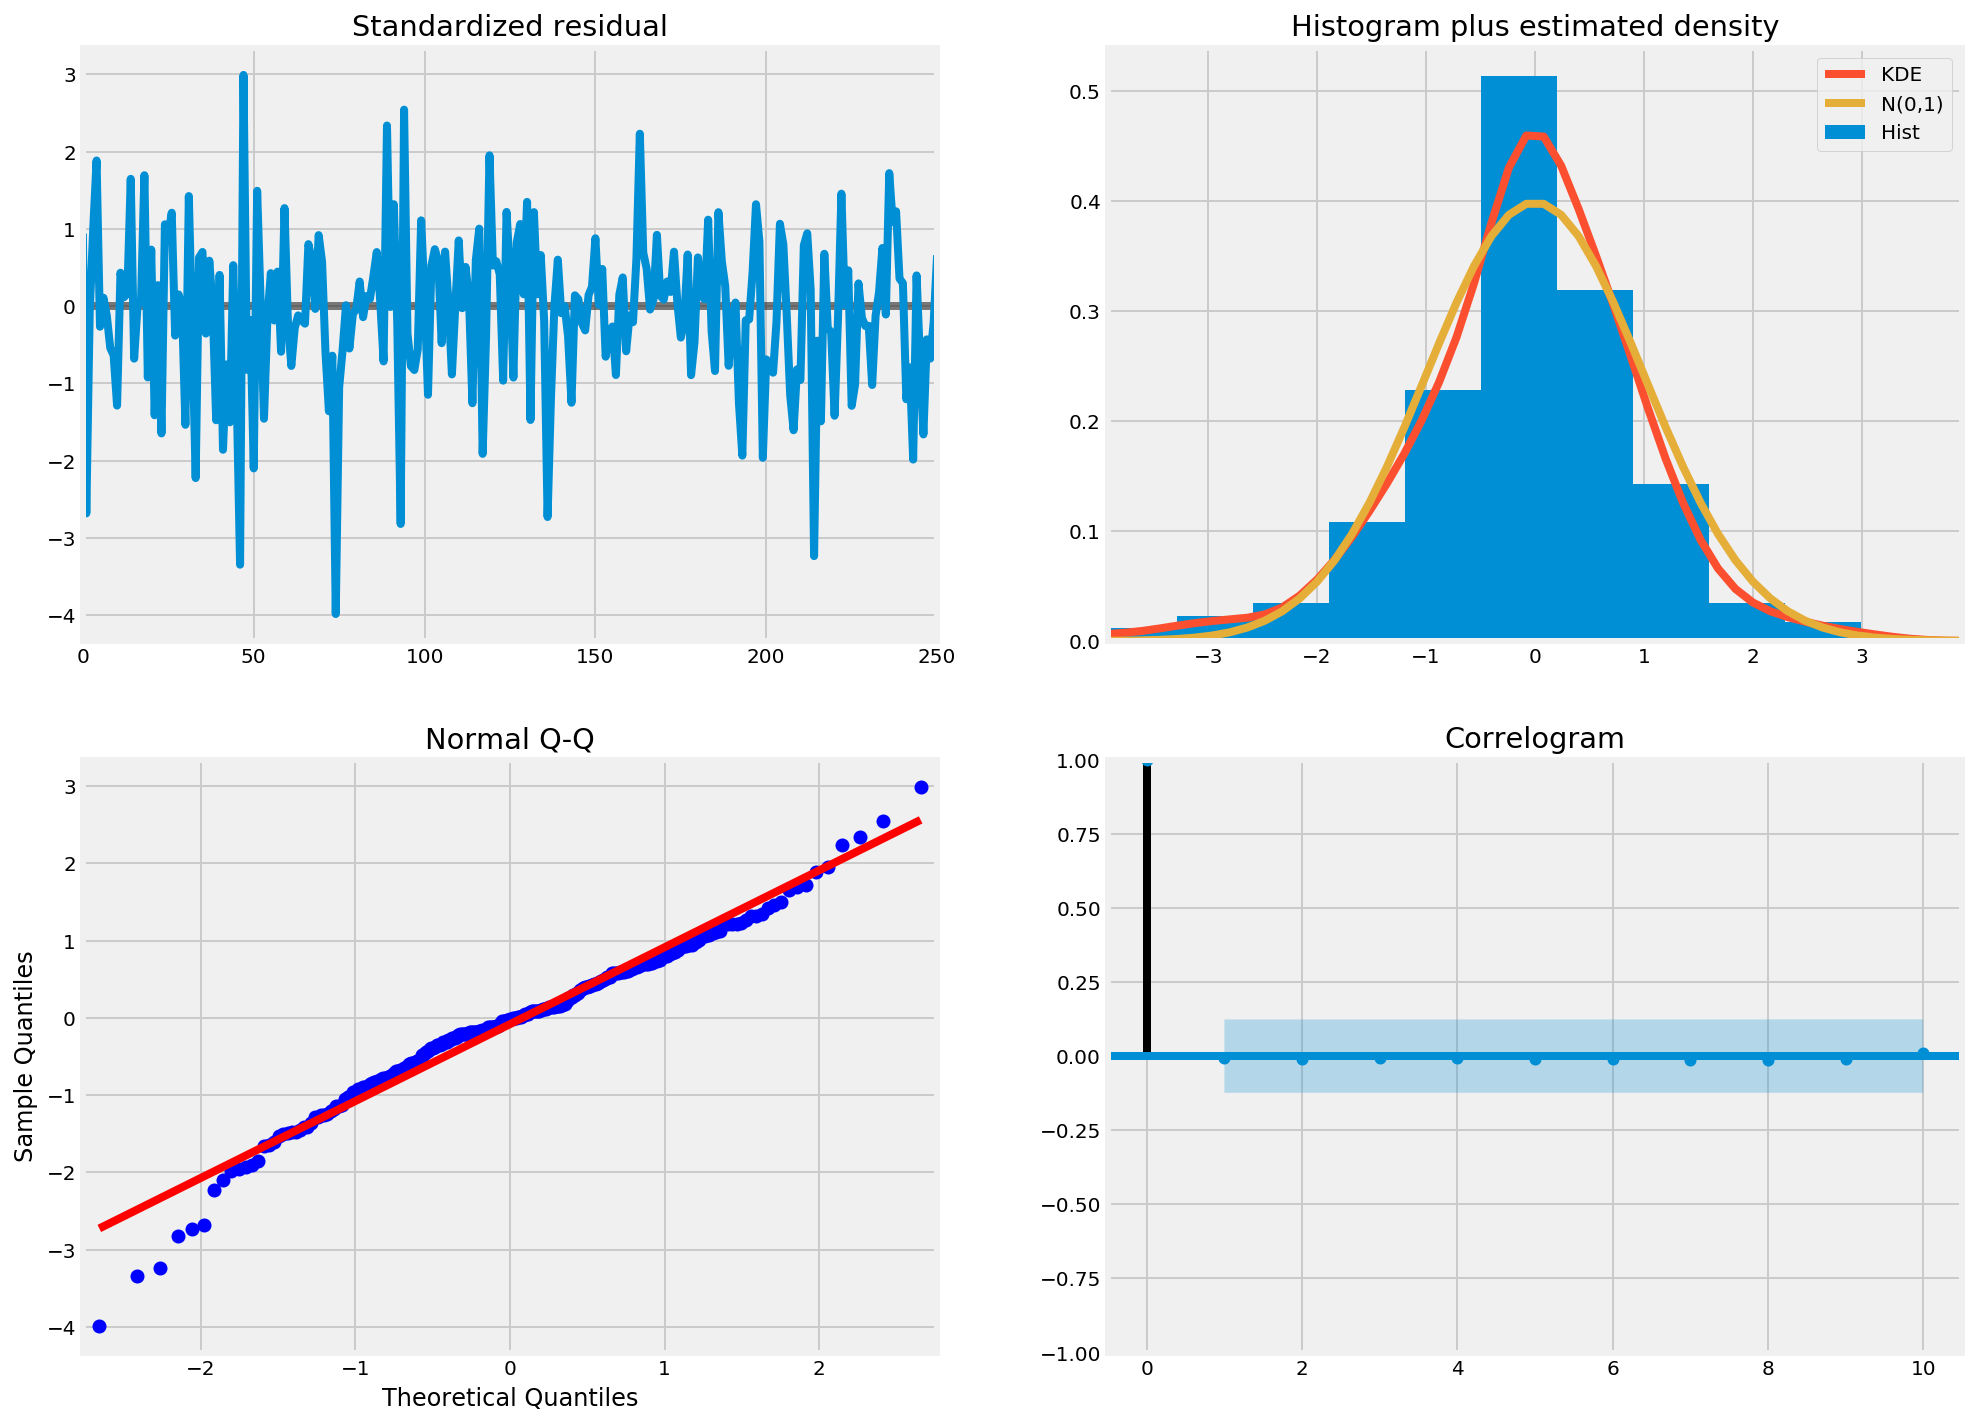

In [31]:
best_model2.plot_diagnostics(figsize=(15, 12))
plt.show()

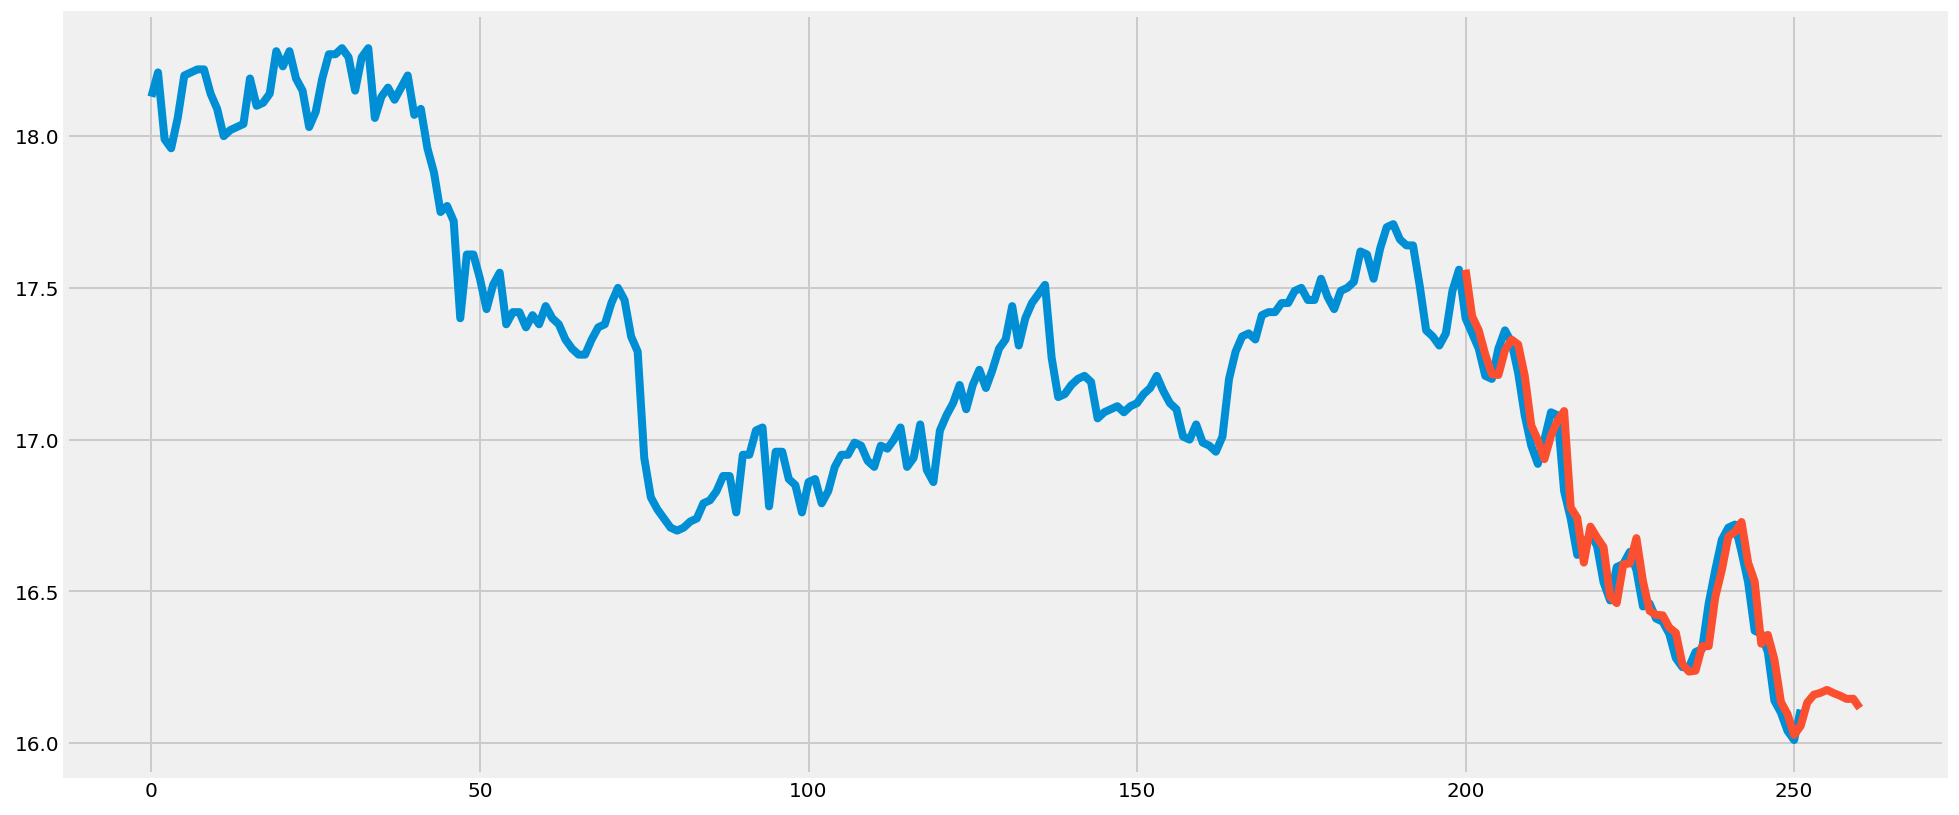

In [42]:
#btc_month_pred.real.plot()
btc_close.plot()
#btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
best_model2.predict(start=200, end=260).plot()